In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import datacube
import s3fs

from deafrica_tools.load_era5 import load_era5

In [5]:
from deafrica_tools import load_era5_netcdf

ImportError: cannot import name 'load_era5_netcdf' from 'deafrica_tools' (/home/jovyan/.local/lib/python3.10/site-packages/deafrica_tools/__init__.py)

In [6]:
# set AWS region to access ERA5 data
s3 = s3fs.S3FileSystem(anon=True, client_kwargs={'region_name':'us-east-1'})

In [7]:
s3.ls('era5-pds/zarr/2021/04/data/')

['era5-pds/zarr/2021/04/data/air_pressure_at_mean_sea_level.zarr',
 'era5-pds/zarr/2021/04/data/air_temperature_at_2_metres.zarr',
 'era5-pds/zarr/2021/04/data/air_temperature_at_2_metres_1hour_Maximum.zarr',
 'era5-pds/zarr/2021/04/data/air_temperature_at_2_metres_1hour_Minimum.zarr',
 'era5-pds/zarr/2021/04/data/dew_point_temperature_at_2_metres.zarr',
 'era5-pds/zarr/2021/04/data/eastward_wind_at_100_metres.zarr',
 'era5-pds/zarr/2021/04/data/eastward_wind_at_10_metres.zarr',
 'era5-pds/zarr/2021/04/data/integral_wrt_time_of_surface_direct_downwelling_shortwave_flux_in_air_1hour_Accumulation.zarr',
 'era5-pds/zarr/2021/04/data/lwe_thickness_of_surface_snow_amount.zarr',
 'era5-pds/zarr/2021/04/data/northward_wind_at_100_metres.zarr',
 'era5-pds/zarr/2021/04/data/northward_wind_at_10_metres.zarr',
 'era5-pds/zarr/2021/04/data/precipitation_amount_1hour_Accumulation.zarr',
 'era5-pds/zarr/2021/04/data/sea_surface_temperature.zarr',
 'era5-pds/zarr/2021/04/data/snow_density.zarr',
 'er

In [20]:
# Madagascar_west
lat = -25.572
lon = 45.538
buffer = 0.04

lat_range = (lat - buffer, lat + buffer)
lon_range = (lon - buffer, lon + buffer)

# Define the time window
time = '2018-01', '2018-12'

In [21]:
east = "eastward_wind_at_10_metres"
north = "northward_wind_at_10_metres"

wind_east = load_era5(east, lat_range, lon_range, time, resample='2h').compute()

wind_north = load_era5(north, lat_range, lon_range, time, resample='2h').compute()

In [22]:
wind = (wind_east[east]**2 + wind_north[north]**2)**0.5
wind.attrs['units'] = wind_east[east].attrs['units']

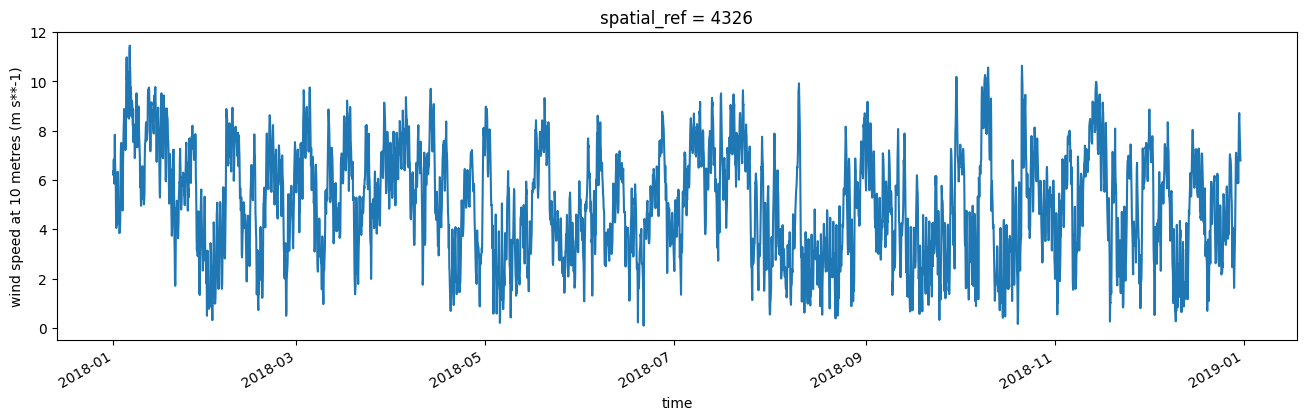

In [23]:
# plot mean wind speed for this area
wind.mean(['lat','lon']).plot(figsize = (16,4));
plt.ylabel('%s (%s)'%('wind speed at 10 metres', wind.attrs['units']));